
# **Understanding Different Feature Scaling Techniques**

**Normalization** is a crucial preprocessing step in machine learning that scales features to a standard range. This helps:
- Improve model training speed
- Prevent features with larger scales from dominating
- Improve algorithm convergence
- Make models more interpretable

In [1]:
import numpy as np              
import pandas as pd             
import matplotlib.pyplot as plt 
import seaborn as sns          
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

##  **Load and Explore the Data**

In [6]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0, 1, 2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']

print(f"Dataset shape: {df.shape}")
print(df.sample(5))

Dataset shape: (178, 3)
     Class label  Alcohol  Malic acid
25             1    13.05        2.05
56             1    14.22        1.70
127            2    11.79        2.13
140            3    12.93        2.81
116            2    11.82        1.47


In [8]:
#  statistical summary of the original data
df.describe()

,Class label,Alcohol,Malic acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


## **Visualize Original Data Distribution**

<Axes: xlabel='Alcohol', ylabel='Density'>

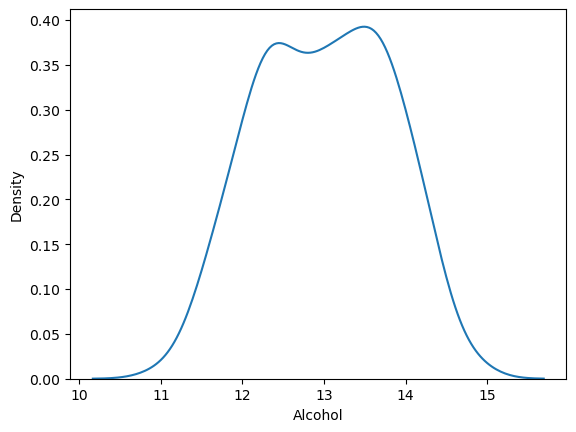

In [10]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

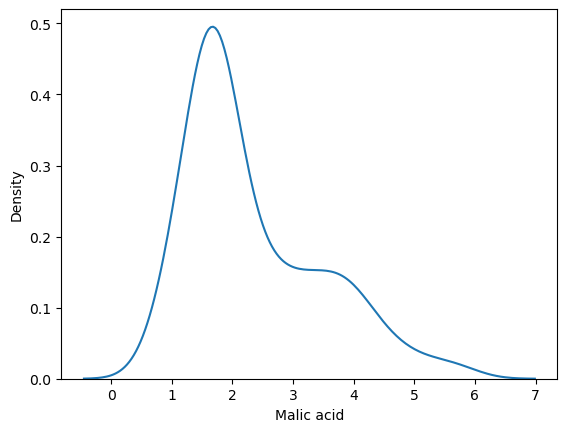

In [11]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

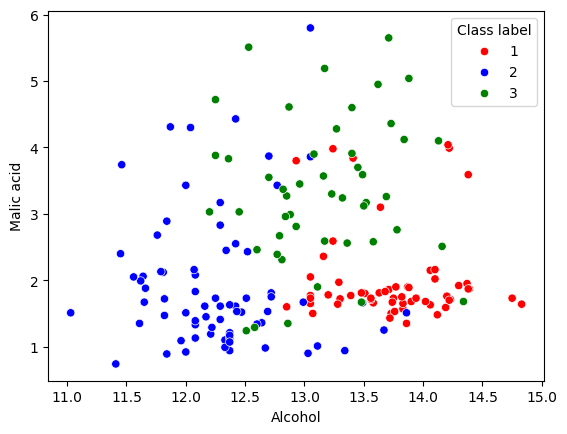

In [13]:
color_dict = {1: 'red', 2: 'blue', 3: 'green'}
sns.scatterplot(
    x='Alcohol',
    y='Malic acid',
    data=df,
    hue='Class label',
    palette=color_dict
)


##  **Train_Test Split**

In [15]:
# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),df['Class label'],test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((124, 2), (54, 2))

## **Apply Min-Max Normalization (0-1 Scaling)**

**Formula:**
$$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

This scales all values to the range [0, 1].

In [20]:
scaler = MinMaxScaler()
scaler.fit(X_train)  

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [21]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.3,1.6
50%,12.9,1.9
75%,13.7,3.2
max,14.8,5.8


In [22]:
# After 
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [25]:
# Apply Standard Scaler (Standardization)
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

# transform train and test sets
X_train_standard = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)


# Convert back to DataFrames for better readability
X_train_standard = pd.DataFrame(X_train_standard, columns=X_train.columns)
X_test_standard = pd.DataFrame(X_test_standard, columns=X_test.columns)


In [26]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


## **Comparison - Before vs After Scaling (Scatter Plot)**

# SCALING METHODS COMPARISON:

## **1. MinMax Scaling [0-1]:**
   -  Range: [0, 1]
   -  Formula: (X - min) / (max - min)
   -  Use when: Need bounded range
   -  Sensitive to outliers

## **2. Standard Scaling (Z-score):**
   -  Range: Usually [-3, 3]
   -  Formula: (X - mean) / std
   -  Use when: Assume Gaussian dist.
   -  Less sensitive to outliers

## **3. Robust Scaling:**
   -  Uses IQR instead of std
   -  Better for data with outliers


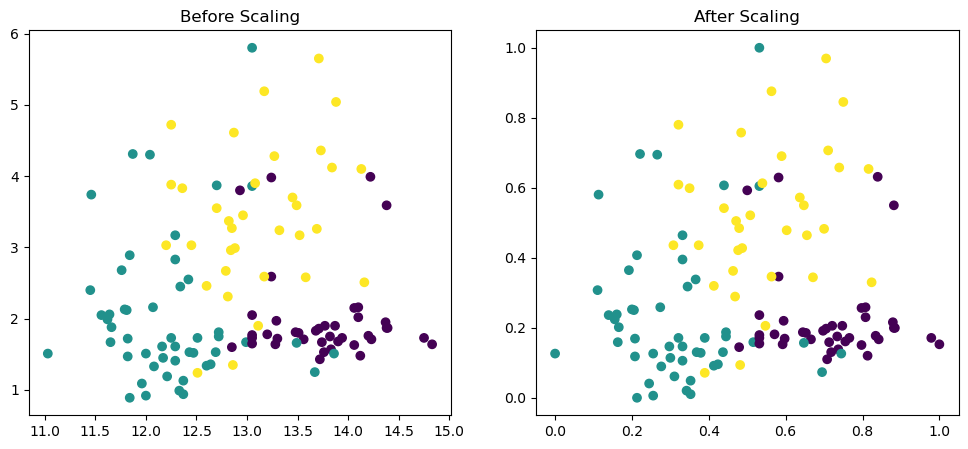

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

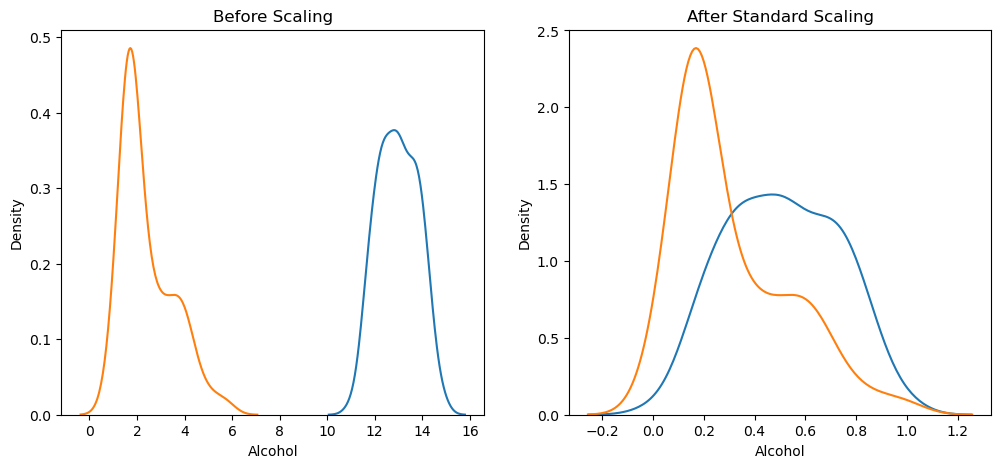

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

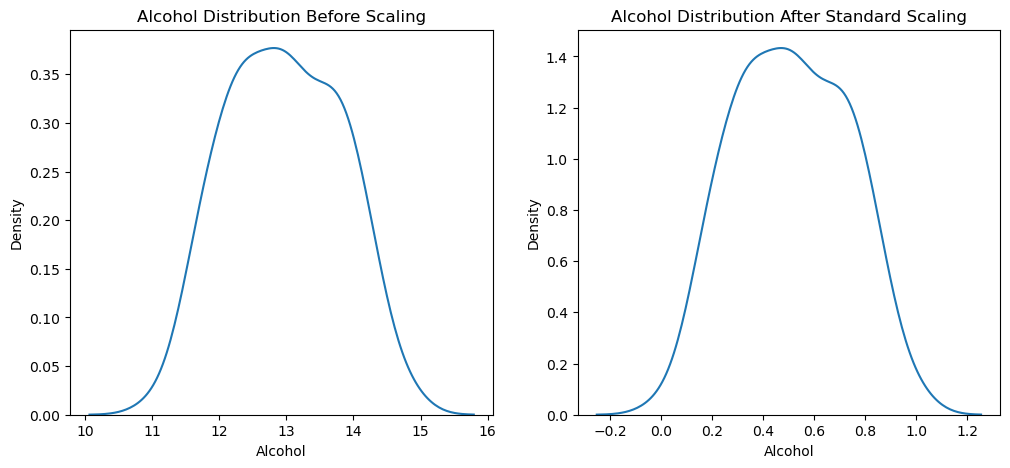

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

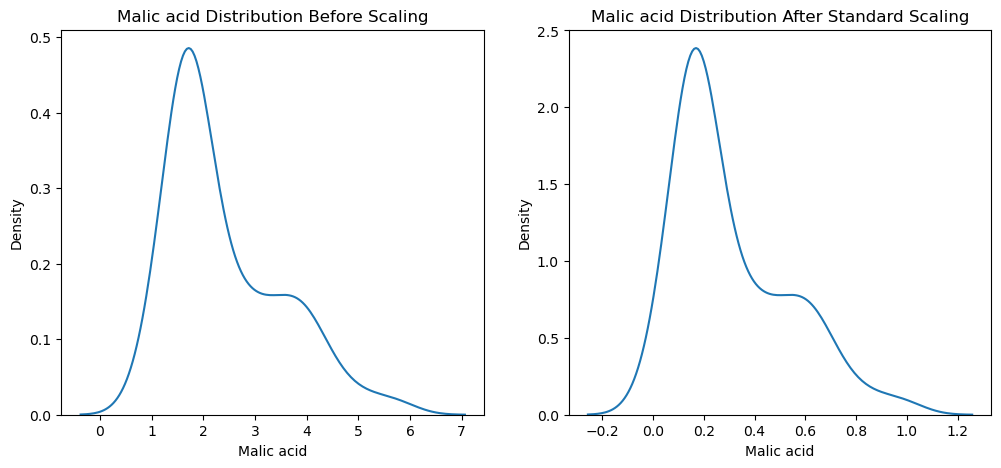

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()